# Pràctica 1: Resolem un problema de classificacio

## Objectius

Els objectius d'aquesta pràctica són:

* Aplicar els coneixements adquirits sobre classificacio, tecniques d'emplenats de nans i validacio creuada.
  
* Ser capac de comparar diferents models classificacio

* Ser capac de fer busca d'hiperparametres.

* Entendre i implamentar la validacio creuada

* Analitzar detalladament els resultats obtinguts durant l'aprenentatge dels diferents models.

Aquesta practica es previa al cas kaggle que realitzareu durant la segona part de l'assignatura. En aquesta primera practica les preguntes estan definides, pero us ha de servir d'aprenentatge alhora de saber com estructurar un projecte d'aprenentatge automatic ja que en el cas kaggle no tindreu les preguntes.

## Bases de dades

En aquesta practica farem servir la base de dades del titanic. L'atribut que predirem es Survived, el qual ens diu si va sobreviure o no cada passatger.


https://www.kaggle.com/c/titanic/data


##Treball en grup
Aquesta practica es treballara en grups de 2-3 persones. En casos excepcionals i degudament justificats la practica es podra realitzar de forma individual.
## Seguiment i entrega de la pràctica

En la pràctica 1, es presenten diverses tasques per fer una correcta comparativa dels resultats obtinguts per diversos mètodes de classificació numèrica en una mateixa base de dades.


En aquesta practica es realitzara sessions de seguiment del treball. Aquestes sessions de treball està orientada a que els alumnes que vingueu pugueu preguntar i resoldre dubtes sobre les dades, preguntar sobre l'objectiu de cada apartat dels enunciats que no us hagi quedat clar, i preguntar sobre els resultats que esteu obtenint a l'hora d'analitzar les dades. Es molt recomanable venir amb el treball fet a clase per tal de poder comentar dubtes.

Pel que fa l'entrega, caldra entregar per caronte el seguent:

1. Memòria en format PDF o en la mateixa notebook explicant els resultats trobats sobre la bases de dades amb el respectiu codi de python. Aquesta nota es la mateixa per tots els membres del grup (9 pts)

2. Presentació amb els resultats 4 min màxim. Aquesta nota es individual. (1 pt)

Nota: En cas d'entregar la memoria com a PDF, caldra entregar el codi de python a part. Si s'entrega com a notebook, la mateixa notebook servira com a codi.



# Descripcio de la pràctica

A continuacio es mostren tots els continguts que s'evaluara en la pràctica:

1. EDA (exploratory data analysis) (1 punts):
  * Analisi de tamany i tipologia de dades ( 0.25 pt)
  * Primera valoracio de correlacions ( 0.5 pt)
  * Analisi atribut target ( 0.25 pt)
2. Preprocessing (2 punts):
  * Eliminacio de nans (0.5 punts)
  * Encoding de categoriques (0.75 punts)
  * Altres (PCA, normalitzacio..)
3. Metric selection (1.5 punts):
  * Seleccio de la millor metrica pel problema (0.75 punts)
  * Visualitzacio de ROC/AUC (0.75 punts)
4. Model Selection amb Crossvalidation (4 punts):
  * Seleccio del millor model (2 punts)
  * Busqueda hiperparametres (2 punts)
5. Analisi final (1.5 punt)

Cal dir que, les puntuacions dins de cada apartat son orientatives. La pràctica esta construida a partir d'un seguit de preguntes orientatives en cada apartat les quals tenen relacio amb els continguts evaluables. **NO cal contestar-les totes**. Són una guia per a que reflexioneu i aprengueu detalls de cada apartat.  Es recomanable, aixo si, llegir totes les preguntes abans de realitzar la practica i tenir-les en ment alhora d'executar-la.


**IMPORTANT**: El que es valorara en la practica es la capacitat de mantenir una narrativa coherent alhora que es realitzen els resultats. No es mirara tant que alguna pregunta quedi per respondre sino que els passos seguits en base als resultats obtinguts siguin coherents.

## 1. EDA (exploratory data analysis) (1 punt)

Abans de res cal sempre veure com es la base de dades asignada:

**Preguntes:**
* Quants atributs té la vostra base de dades?
* Quin tipus d'atributs tens? (Númerics, temporals, categorics, binaris...)
* Com es el target, quantes categories diferents existeixen?
* Tenim nans en les dades?
* Podeu veure alguna correlació entre X i y?
* Estan balancejades les etiquetes (distribució similar entre categories)? Creus que pot afectar a la classificació la seva distribució?


In [190]:
#Importem pandas i numpy
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [191]:
# Carreguem les dades
dataset_name= 'train'
df = pd.read_csv(f'data/{dataset_name}.csv')

#### Quantitat i tipus d'atributs

Abans de res, anem a observar el nombre d'atributs del nostre dataset, així com els diferents tipus de dades que tenim i els valors que poden prendre.

In [192]:
# Tipus d'atributs
tipus_atributs = df.dtypes

# Valors que pot prendre la variable target
target = 'Survived'
categories_target = df[target].unique()
num_categories_target = len(categories_target)

# Resultats
print(f"Número d'atributs: {df.shape[1]}")
print(f"Número de files: {df.shape[0]}")
print("Tipus d'atributs:")
print(df.dtypes)
print(f"\nTarget '{target}': {num_categories_target} categories diferents: {categories_target}\n")

# Visualitzem les primeres 5 instàncies del dataset
df.head()

Número d'atributs: 12
Número de files: 891
Tipus d'atributs:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Target 'Survived': 2 categories diferents: [0 1]



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Observem que hi ha un total de 12 atributs. La majoria de columnes són valors numèrics, encara que hi ha una variable que és un string ("Name") i hi ha algunes variables categòriques (PClass, Sex, Embarked). Les variables "Ticket" i "Cabin" combinen caràcters i números. D'altra banda, la variable target del nostre problema ("Survived") és binària. Es tracta, doncs, d'un problema de classificació on hi ha dues classes: el passatger ha sobreviscut o no.
Tot això s'haurà de tenir en compte a l'hora de processar les dades per tal de no produir inconsistències.

A continuació anem a observar quin és el comportament general de les dades numèriques i quins valors prenen al llarg de tot al dataset.

In [193]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Podem veure que la mitjana en la columna "Survived" és inferior a 0.5, el que indica que tenim més passatgers que no han sobreviscut que no pas passatgers que si que ho han fet. D'altra banda, la mitjana d'edat dels passatgers és de 30 anys, el que indica que la major part dels passatgers era jove (encara que tenim valors més grans, com el de la persona més gran del passatger, que viatjava amb 80 anys). També podem veure el preu mitjà del ticket (32.2), encara que això no ens aporta informació massa interessant.

#### Detecció de NaNs

A la fila de valors "count" de la taula anterior, podem veure que hi ha columnes amb menys instàncies (cosa que ens indica que hi haurà NaNs a les dades). A continuació anem a veure el percentatge que suposen aquests NaNs a cada columna del dataset.

In [194]:
nan_percentage = df.isna().mean()
nan_columns = nan_percentage[nan_percentage > 0]
nan_columns.sort_values(ascending=False)

Cabin       0.771044
Age         0.198653
Embarked    0.002245
dtype: float64

Observem que tenim 3 atributs amb algun valor NaN (en el cas de la variable Cabin és de gairebé el 80%!). Més endavant, a la secció 2, veurem com tractar aquest problema.


#### Correlació entre variables

Abans de començar a processar les dades, és interessant mirar si hi ha alguna correlació entre les dades del dataset i la nostra variable target (és a dir, si té sentit intentar predir la supervivència del passatgers a partir de les dades que disposem). Abans, però, eliminarem dues variables que no es faran servir a l'hora de constuir els models. Aquestes columnes son:
- PassangerID: no s'utilitzarà a l'hora de construir models ja que és única per passatger i no aporta informació sobre la persona. Té una funció simplement organitzativa.
- Ticket: en aquest cas, no és única per passatger (es repeteix entre algunes persones que viatgen juntes). Tot i això, l'única manera en que ens podria ser útil seria per guardar d'alguna manera la relació entre passatgers que comparteixen ticket. No obstant, com que al processar les dades el format del ticket canvia, quan entrem noves dades no serà possible saber si el nou passatger comparteix bitllet i, en cas afirmatiu, amb qui. És per això que s'elimina la variable.

In [195]:
df.drop(['PassengerId','Ticket'],axis='columns', inplace=True)

Ara ja podem mirar si hi ha alguna correlació entre X i y, i per fer-ho utilitzarem la matriu de correlació.

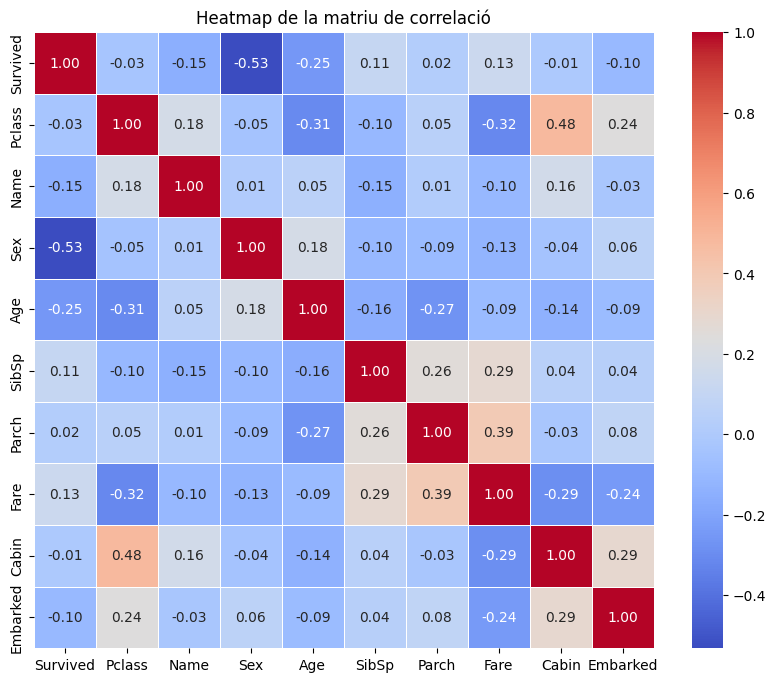

In [196]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Cal tenir les variables com a numèriques i eliminar els nans. De moment farem la conversió utilitzant el Label Encoder, més endavant ho farem nosaltres
df_cleared = df.dropna()  # Realitzem una copia del df sense nans per observar la matriu de correlació
numeric_features = df_cleared.select_dtypes(np.number).keys()
non_numeric = [k for k in df_cleared.keys() if k not in numeric_features]
df_cleared.loc[:,non_numeric] = df_cleared.loc[:,non_numeric].apply(LabelEncoder().fit_transform)

# Calcular la matriu de correlació i mostrar-ne un heatmap
correlation_matrix = df_cleared.corr(method='pearson', min_periods=1, numeric_only=False)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap de la matriu de correlació')
plt.show()

El problema d'aquesta matriu de correlació és que al eliminar les files amb Nans ens quedem amb poques dades. Com que la columna Cabin té un 80% de valors NaN, l'eliminem conjuntament amb les files amb Nans que quedin per observar de nou la matriu de correlació. Aquesta primera matriu només ens serveix per veure que "Cabin" està relacionada amb "Embarked", "Fare" i "PClass", però no amb "Survived".

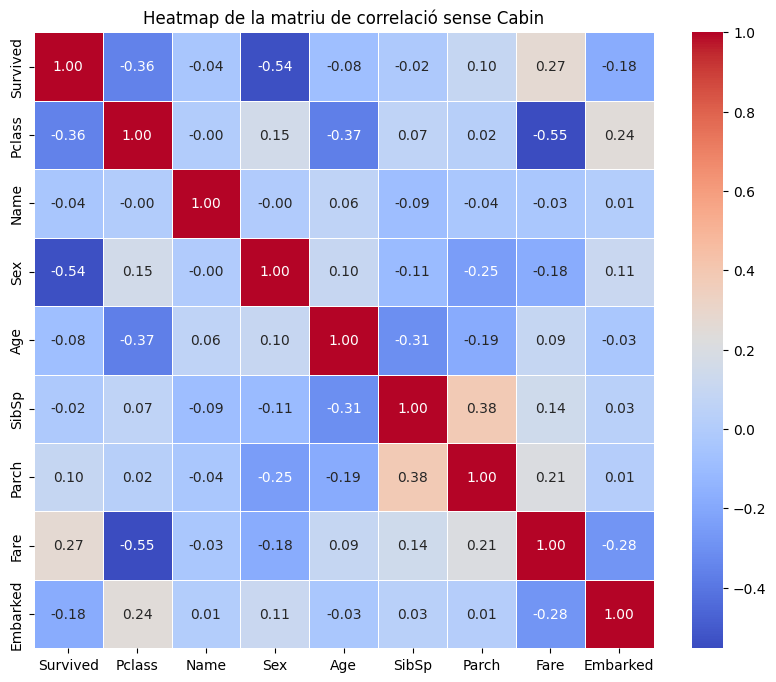

In [197]:
# Eliminem la columna Cabin i la resta de files amb NaNs per poder veure la matriu de correlació
df_cleared2 = df.copy()
df_cleared2.drop(['Cabin'],axis='columns', inplace=True)
df_cleared2.dropna(inplace=True)

# Convertim les variables a numèriques
numeric_features = df_cleared2.select_dtypes(np.number).keys()
non_numeric = [k for k in df_cleared2.keys() if k not in numeric_features]
df_cleared2.loc[:,non_numeric] = df_cleared2.loc[:,non_numeric].apply(LabelEncoder().fit_transform)

# Ara podem veure una matriu de correlació utilitzant més dades (però eliminant la columna Cabin)
correlation_matrix = df_cleared2.corr(method='pearson', min_periods=1, numeric_only=False)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap de la matriu de correlació sense Cabin')
plt.show()

De la matriu en podem extreure que la variable target "Survived" està fortament relacionada (negativament) amb la variable "Sex" i "PClass" (-0.54 i -0.36), i encara que en menor mesura, també ho està amb "Fare" (0.27) i "Embarked" (-0.18). Podem dir que val la pena continuar amb el model predictor ja que tot apunta a que podrem intentar predir l'atribut "Survived" a partir de la resta de valors del dataset.

#### Balanceig en les dades

Abans d'enfrontar un problema de classificació és necessari mirar si les dades de que disposem estan balencejades, és a dir, si hi ha una representació semblant dels diversos valors de l'atribut target.

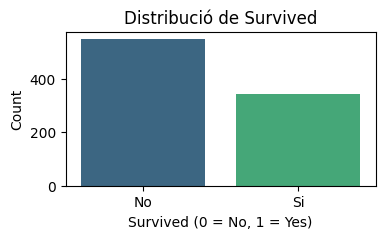

In [198]:
# Distribució de la variable 'Survived'
plt.figure(figsize=(4, 2))
sns.countplot(x='Survived', data=df, palette='viridis')
plt.title('Distribució de Survived')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Si'])
plt.show()

Observem que hi ha un desbalanç força important en la classe predita. Això és important, ja que s'haurà de tenir en compte a l'hora de seleccionar la mètrica que avalui el model. Per finalitzar amb l'EDA, anem a veure la distribució d'altres atributs del dataset que poden ser interessants.

#### Distribució d'atributs del dataset

Com que en la matriu de correlació hem observat una forta relació entre el sexe i la supervivència, pot ser interessant observar el % de supervivència en funció del sexe i la edat.

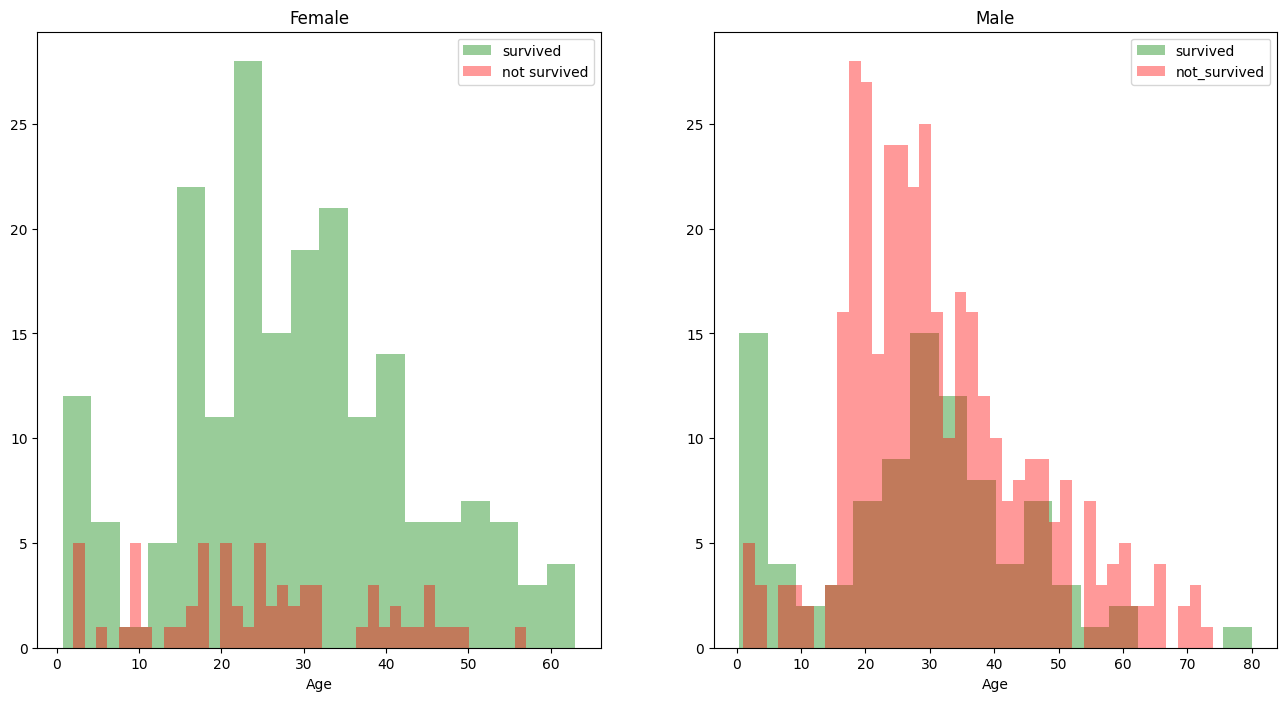

In [199]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 8))
women = df[df['Sex']=="female"]
men = df[df['Sex']=="male"]
ax = sns.distplot(women[women['Survived']==1]["Age"], bins=18, label = 'survived', ax = axes[0], kde =False, color="green")
ax = sns.distplot(women[women['Survived']==0]["Age"], bins=40, label = 'not survived', ax = axes[0], kde =False, color="red")
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1]["Age"], bins=18, label = 'survived', ax = axes[1], kde = False, color="green")
ax = sns.distplot(men[men['Survived']==0]["Age"], bins=40, label = 'not_survived', ax = axes[1], kde = False, color="red")
ax.legend()
_ = ax.set_title('Male')

Dels gràfics en podem extreure que les dones en van tendir a sobreviure més que els homes. A més, del gràfic de la dreta podem treure que els nens també tendeixen a sobreviure més que els adults. Aquesta informació té sentit, ja que les dones i els nens solen ser considerades "més important" que els homes adults pel que a supervivència refereix.

Finalment, com que a la matriu de correlació observem que la variable PClass també té una forta relació amb Survived, anem a visualitzar el percentatge de passatgers que sobreviuen en cada classe per intentar extreure alguna primera conclusió.

<Axes: xlabel='Pclass', ylabel='Survived'>

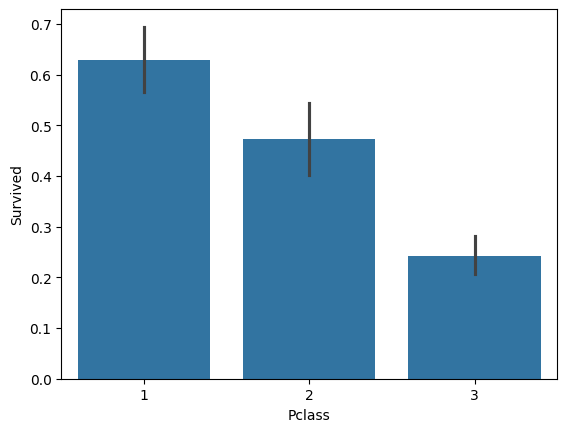

In [200]:
sns.barplot(x='Pclass', y='Survived', data=df)

Veiem que els passatgers de les classes més "luxoses" van sobreviure en major proporció. Això podria indicar que a l'hora d'evacuar el vaixell es va fer d'una manera desbalancejada en benefici de les persones de classe "luxosa".

## 2. Preprocessing (normalitzation, outlier removal, feature selection..) (2 punts)
Un cop vistes les dades de les que es disposa, cal preparar les dades per als nostres algoritmes. Segons la tipologia de dades, es poden filtrar atributs, aplicar-hi reductors de dimensionalitat, codificar categories textuals en valors numèrics, normalitzar les dades, treure outliers...

Navegueu per la [documentació de sklearn sobre preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html) per tal de trobar les diferents opcions que proporciona sklearn.

**Preguntes:**
* Estàn les dades normalitzades? Caldria fer-ho?
* En cas que les normalitzeu, quin tipus de normalització será més adient per les vostres dades?
* Teniu gaires dades sense informació (nans)? Tingueu en compte que hi ha metodes que no els toleren durant el aprenentatge. Com afecta a la classificació si les filtrem? I si les reompliu? Com ho farieu? [Pista](https://scikit-learn.org/stable/modules/impute.html)
* Teniu dades categoriques? Quina seria la codificació amb més sentit?
* Podreu treure algun atribut extra de les categoriques (per exemple, aplicant alguna regla sobre el text)?
* Caldria aplicar PCA? Quins beneficis o inconvenients trobarieu?
* Caldria aplicar alguna tecnica de seleccio de features? Ho trobeu necessari?
* Es poden aplicar PolynomialFeatures per millorar la classificació? En quins models té sentit fer-ho?

Com que tenim bastants valors NaNs al dataset, el primer pas a l'hora de preparar les dades és tractar aquest problema abans de procedir.

#### Tractament NaNs

En el cas de Cabin, podem veure que el percentage de NaNs és molt elevat (gairebé el 80%). Aquesta variable està força realcionada amb PClass, així que podríem intentar omplir-la en funció d'aquesta. Però si mirem els valors de PClass dels passatgers que tenen valor a Cabina, veiem que pràcticament només tenim dades dels de classe 1.

In [201]:
df_cabin = df.copy()
df_cabin['Passatgers amb cabina'] = df_cabin['Cabin'].str[0]
counts = df_cabin.groupby('Pclass').size().reset_index(name='Passatgers per classe')
df_cabin.dropna(inplace=True)

df_cabin = df_cabin[["Pclass", "Passatgers amb cabina"]].groupby(['Pclass'], as_index=False).count()
merged_df = pd.merge(df_cabin, counts, on='Pclass')
merged_df['Percentage'] = merged_df['Passatgers amb cabina'] / merged_df['Passatgers per classe'] * 100

merged_df

,Pclass,Passatgers amb cabina,Passatgers per classe,Percentage
0,1,158,216,73.148148
1,2,15,184,8.152174
2,3,10,491,2.036660


Veiem que els valors de Cabin estan esbiaixats respecte la variable PClass, pràcticament només tenim passatgers amb cabina de la classe 1, i per tant no tenim manera d'omplir les dades que falten. Optem per eliminar la columna en si, ja que, a més a més, és una variable que no està gens relacionada amb Survived

In [202]:
df = df.drop(['Cabin'],axis='columns')

Pel que fa a la columna "Embarked", com que el percentage de NaNs d'aquesta columna es molt baix (0.2% - que suposa 2 files), podem omplir els valors que quedem amb la porta més comuna en el dataset sense que això afecti significativament a les dades.

In [203]:
def fill_embarked(df: pd.DataFrame):
    mode_embarked = df['Embarked'].mode()[0]
    df['Embarked'].fillna(mode_embarked, inplace=True)
    return df
df = fill_embarked(df)

Per acabar amb els NaNs, a la matriu de correlació hem observat que hi ha una certa relació negativa entre "Age" i les variables "PClass" i "Sibsp". És per això que té sentit intentar omplir els valors restants emprant l'algorisme KNN (és a dir, omplit el buit de les files amb NaNs amb el valor que més es repeteix entre les instàncies del dataset semblants). Per poder-ho fer, abans hem de convertir les variables categòriques a numèriques.

#### Convertir dades categòriques a numèriques

Per convertir les variables categòriques a numèriques el que farem serà crear columnes binàries noves. Fer una numeració de 1 fins a n no té massa sentit. Per exemple,fer una mitjana entre una persona que vagi a la classe 1 i una altra que vagi a la classe 3 i que ens doni la classe 2 seria erroni.

In [204]:
def convert_to_categorical(df: pd.DataFrame) -> pd.DataFrame:
    # Convertir les variables categòriques en columnes binàries
    dummies_embarked = pd.get_dummies(df['Embarked'], drop_first=False)
    dummies_embarked = dummies_embarked.rename(columns={
        'Q':'EmbarkedQ',
        'C':'EmbarkedC',
        'S':'EmbarkedS'
    })

    dummies_pclass = pd.get_dummies(df['Pclass'], drop_first=False)
    dummies_pclass = dummies_pclass.rename(columns={
        1:'Pclass1',
        2:'Pclass2',
        3:'Pclass3'
    })

    dummies_sex = pd.get_dummies(df['Sex'], drop_first=False)
    dummies_sex = dummies_sex.rename(columns={
        'male':'SexMale',
        'female':'SexFemale'
    })

    # Combinem el dataframe original amb les noves columnes i eliminem la original
    df = pd.concat([df, dummies_pclass, dummies_embarked, dummies_sex], axis=1)
    df = df.drop(['Embarked', 'Pclass','Sex'], axis="columns")
    return df
df = convert_to_categorical(df)

L'única dada no numèrica que ens falta és el nom. Com que és única per a cada passatger, l'excolurem per a fer el knn. Més endavant, però, ens serà útil.

In [205]:
Name = df['Name']
df = df.drop(['Name'], axis="columns")

#### Imputació de valors a la columna Age

Ara ja podem imputar els valors faltants a la columna Age utilitzant l'algorisme KNN

In [206]:
from sklearn.impute import KNNImputer

def impute_cols(df: pd.DataFrame, cols: list):
    imputer = KNNImputer(n_neighbors=5, weights="uniform")
    for col in cols:
        df[[col]] = imputer.fit_transform(df[[col]])
    return df
df = impute_cols(df, ["Age"])

#### Afegir atributs extra

Un cop totes les dades del nostre dataset són numèriques i ja no hi ha Nans, podem intentar afegir variables noves a partir de les ja existents. Pot ser que aquestes variables no suposin millores en els models construits, però en provarem 3 per veure si n'hi ha. Hem optat per afegir les següents:
- IsAlone: Variable binària que pren el valor True si el passatger es troba sol en el vaixell o False si va a acompanyat d'algú.
- FamilySize: Variable entera que indica la mida del grup de persones amb les que viatja el passatger (inclòs ell).
- Title: Titol que acompanya el nom del passatger (Mr, Miss, Master, Other)

Comencem afegint l'atribut IsAlone i FamilySize i mirem si hi ha una relació entre aquests valors i la supervivència

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


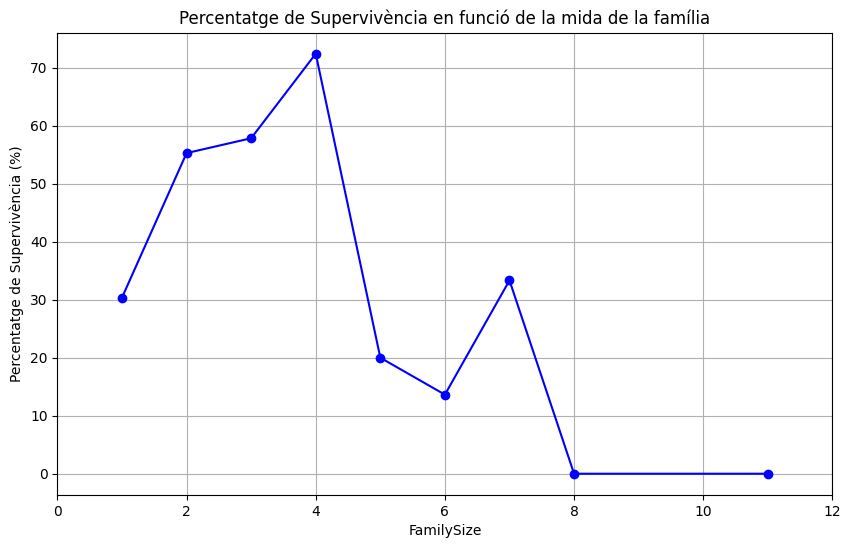

In [207]:
def add_family_attributes(df):
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = np.where(df['FamilySize'] == 1, 1, 0)
    return df
    
df = add_family_attributes(df)

print(df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())
survival_rate_famsize = df.groupby('FamilySize')['Survived'].mean() * 100

plt.figure(figsize=(10, 6))
plt.plot(survival_rate_famsize.index, survival_rate_famsize, marker='o', linestyle='-', color='b')
plt.xlim(0,max(df['FamilySize'])+1)
plt.title('Percentatge de Supervivència en funció de la mida de la família')
plt.xlabel('FamilySize')
plt.ylabel('Percentatge de Supervivència (%)')
plt.grid()
plt.show()

Observem que aquells passatgers que van sols en el vaixell o acompanyats de 4 (o més) persones representen un percentatge de supervivència menor que els que van en grups de 2,3 o 4 (assolint el màxim a 4). Això podria indicar que aquesta nova variable ens serà útil.

Anem a afegir la variable Title.

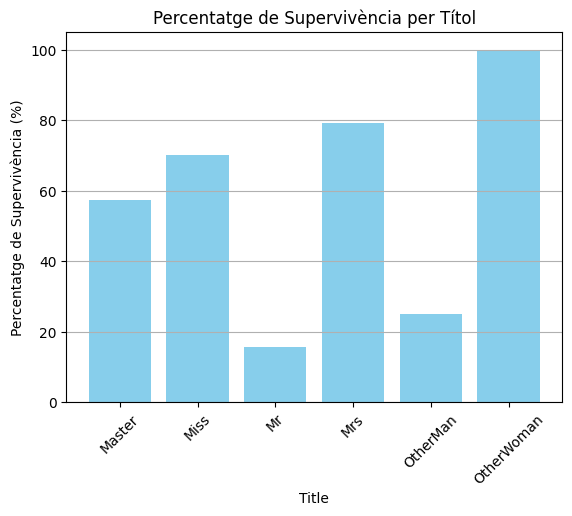

In [208]:
def add_title_attribute(df):
    df['Title'] = Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', ''], 'OtherWoman')
    df.loc[(df['Title'] == 'OtherWoman') & (df['SexMale'] == 1), 'Title'] = 'OtherMan'
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
    return df
df = add_title_attribute(df)

survival_rate_title = df.groupby('Title')['Survived'].mean() * 100

plt.bar(survival_rate_title.index, survival_rate_title, color='skyblue')
plt.title('Percentatge de Supervivència per Títol')
plt.xlabel('Title')
plt.ylabel('Percentatge de Supervivència (%)')
plt.xticks(rotation=45) 
plt.grid(axis='y')
plt.show()

Observem que per aquesta variable també hi ha diferències en el percentatge de supervivència. Convertim-la a numèrica abans de continuar.

In [209]:
def convert_title_to_numeric(df: pd.DataFrame) -> pd.DataFrame:
    dummies_title = pd.get_dummies(df['Title'], drop_first=False)
    dummies_title = dummies_title.rename(columns={
        'Miss':'TitleMiss',
        'Mr':'TitleMr',
        'Mrs':'TitleMrs',
        'Master':'TitleMaster',
        'OtherWoman':'TitleOtherWoman',
        'OtherMan':'TitleOtherMan'
    })

    df = pd.concat([df, dummies_title], axis=1)
    df = df.drop(['Title'], axis="columns")
    return df

df = convert_title_to_numeric(df)

Per acabar amb les variables noves, anem a visualitzar de nou la matriu de correlació però només per la variable target i les que s'han afegit.

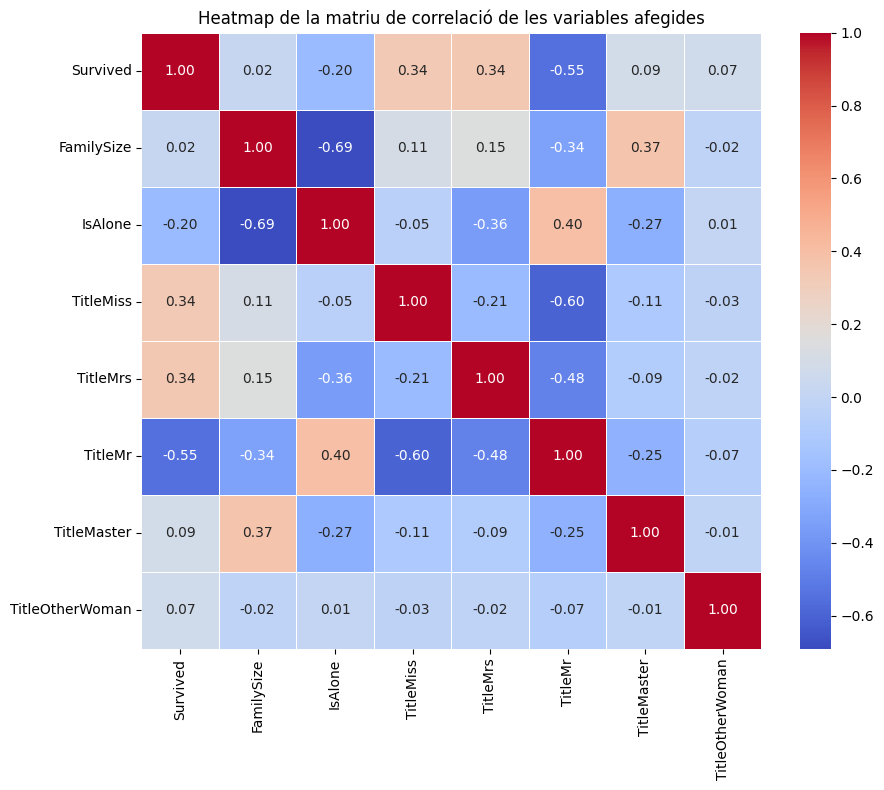

In [210]:
correlation_matrix = df[['Survived','FamilySize', 'IsAlone', 'TitleMiss', 'TitleMrs' ,'TitleMr','TitleMaster', 'TitleOtherWoman']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap de la matriu de correlació de les variables afegides')
plt.show()

Observem que la correlació més forta amb survived apareix en les variables de titol Miss, Mrs i Mr (positiva per els titols de dona, negativa pels d'home), cosa que té sentit amb els resultats de l'EDA ja que ens apareixia que les dones tendien en general a sobreviure més. D'altra banda, IsAlone també té una relació forta (-0.2) amb "Survived". És per això que aquestes noves variables s'utilitzaran en els propers models.

D'altra banda, pel que fa a la variable FamilySize, encara que en el gràfic FamilySize vs % Survived ens apareixia una certa relació, a la matriu de correlació podem observar que no està gens relacionada amb "Survived". No té sentit continuar-la utilitzant en els propers models, per això l'eliminem.

In [211]:
df=df.drop(['FamilySize'], axis='columns')

#### Normalització

Amb les variables noves afegides encara tenim un problema: les dades no estan normalitzades. És important fer-ho ja que els diversos valors estan en escales diferents i no sols perjudicaria a la interpretabilitat dels resultats sinó que també a la optimització dels algorismes. Utilitzarem la funció StandardScaler, que transforma els atributs de manera que tots tinguin mitjana 0 i desviació estàndard 1.

In [212]:
from sklearn.preprocessing import StandardScaler

target_att = 'Survived'
attributes = [k for k in df.keys() if k!= target_att]
X = df[attributes]
y = df[[target_att]]
sc = StandardScaler()
X_norm = sc.fit_transform(X)

#### Feature selection

Actualment el dataset té molts atributs (14 sense contar el target). Això és bo perquè disposem de molta informació dels passatgers, però per altra banda podria ser que ens apareigués un problema: Overfitting. Podria ser que els models que construissim donessin un resultat molt bo per les dades conegudes però al aparèixer nous passatgers es comportessin malament. Anem a construir un primer model molt senzill per veure si aparèix el problema i, en cas afirmatiu, anem a veure com enfrontar-lo.

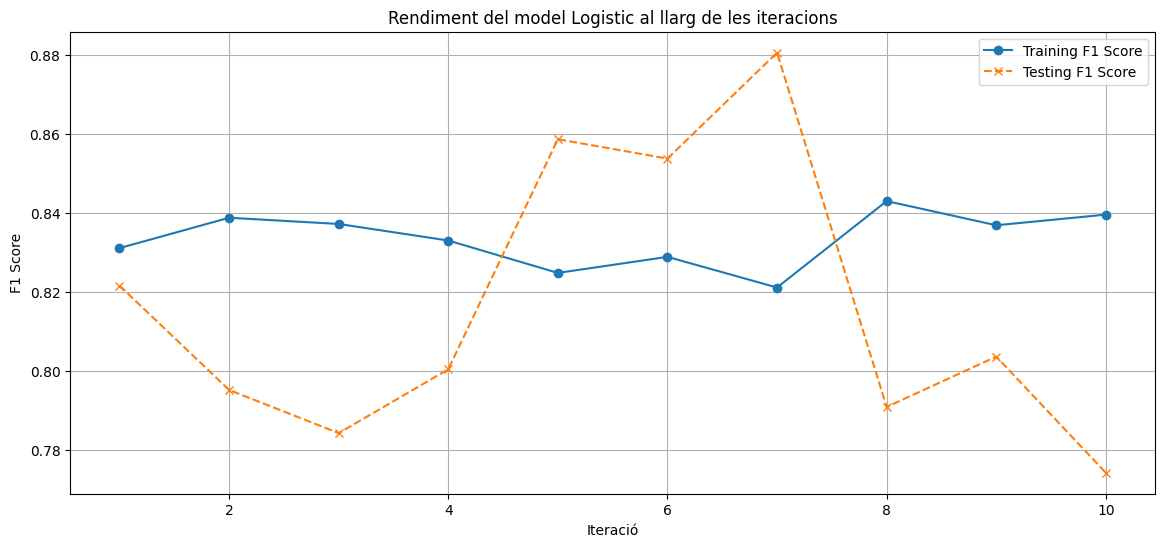

Average Training F1 Score: 0.8335
Average Testing F1 Score: 0.8164


In [213]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

train_scores = []
test_scores = []
n_iterations = 10
test_size = 0.2

for i in range(n_iterations):
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=test_size, random_state=i)
    
    model = LogisticRegression(max_iter=1000)  
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_score = f1_score(y_train, y_train_pred, average='weighted')  
    test_score = f1_score(y_test, y_test_pred, average='weighted')

    train_scores.append(train_score)
    test_scores.append(test_score)

plt.figure(figsize=(14, 6))
plt.plot(range(1, n_iterations + 1), train_scores, label='Training F1 Score', marker='o', linestyle='-')
plt.plot(range(1, n_iterations + 1), test_scores, label='Testing F1 Score', marker='x', linestyle='--')
plt.title('Rendiment del model Logistic al llarg de les iteracions')
plt.xlabel('Iteració')
plt.ylabel('F1 Score')
plt.legend()
plt.grid()
plt.show()

print(f"Average Training F1 Score: {np.mean(train_scores):.4f}")
print(f"Average Testing F1 Score: {np.mean(test_scores):.4f}")


Veiem que en aquest primer model no es produeix un overfitting.

Tot i això, podria ser interessant aplicar alguna tècnica de reducció de dimensionalitat amb l'intenció d'eliminar característiques irrellevants i millorar la velocitat dels models. En el nostre cas hem optat per implementar PCA amb diversos nombres de components i Polynomial Features.

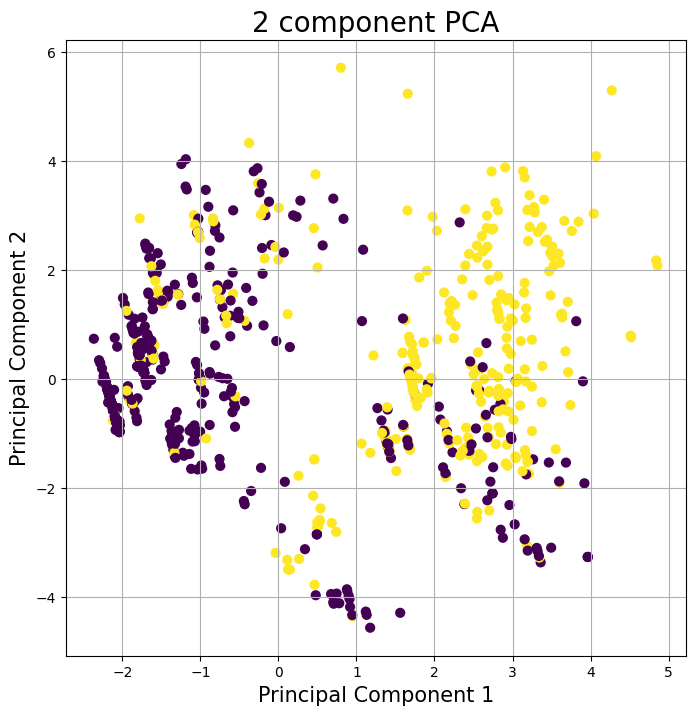

In [214]:
from sklearn.decomposition import PCA

# Provem PCA amb 2 components
pca = PCA(n_components=2)
y_pca = np.array(y)
X_data_pca_2 = pca.fit_transform(X_norm)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

ax.scatter(X_data_pca_2[:,0], X_data_pca_2[:,1],c = y_pca[:], s = 40, cmap='viridis')
ax.grid()

Al aplicar PCA amb 2 components, podem observar que hi ha una separació difusa entre les dues classes a classificar. Anem a provar per 3 components aviam si s'accentua més aquesta separació.

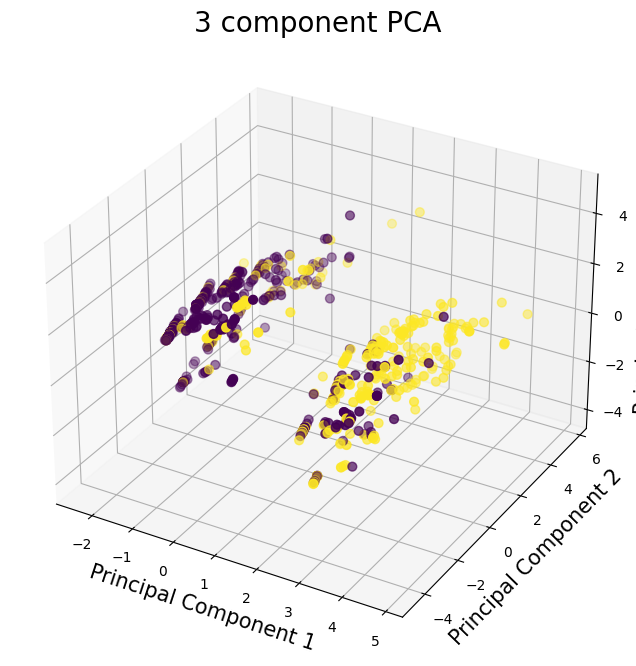

In [215]:
pca = PCA(n_components=3)
X_data_pca_3 = pca.fit_transform(X_norm)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_zlabel('Principal Component 3', fontsize=15)
ax.set_title('3 component PCA', fontsize=20)

scatter = ax.scatter(X_data_pca_3[::1, 0], 
                     X_data_pca_3[::1, 1], 
                     X_data_pca_3[::1, 2], 
                     c=y_pca[::1], s=40, cmap='viridis')

ax.grid()


plt.show()

Aparentment pot semblar que al aplicar PCA no ens permet realitzar una separació de les dades que ens permeti construir millors models. A l'apartat 4, però, veurem si aquesta tècnica ens pot servir com a millora.

Respecte aplicar PolynomialFeatures o no, no té gaire sentit intentar-ho aplicar en el nostre problema perquè no té sentit, per exemple, multiplicar el sexe amb l'edat.

## 3. Metric selection (1.5 punts)
En aquest apartat ens centrarem en les mètriques de classificació ([documentació](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)). Per a fer-ho, entreneu una regressio logistica (no cal separar train-test) i a partir d'aquesta generarem una serie de funcions per analitzar els nostres resultats . Aquestes funcions ens serviran mes endevant. Caldra tambe triar la metrica que farem servir despres per triar el millor model.

**Preguntes:**
* A teoria, hem vist el resultat d'aplicar el `accuracy_score` sobre dades no balancejades. Podrieu explicar i justificar quina de les següents mètriques será la més adient pel vostre problema? `accuracy_score`, `f1_score` o `average_precision_score`?
* Abans de comencar a entrenar models, genereu una suite de funcions per poder analitzar graficament com esta anant el vostre model. Mostreu la Precisió-Recall Curve i la ROC Curve. Quina és més rellevant pel vostre dataset? Expliqueu amb les vostres paraules, la diferencia entre una i altre [Pista](https://stats.stackexchange.com/questions/338826/auprc-vs-auc-roc)
* Què mostra [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)? Quina métrica us fixareu per tal de optimitzar-ne la classificació pel vostre cas?

Nota: Fixeu-vos que en aquest apartat NO ES VALOREN ELS RESULTATS. L'unic que es valora es l'eleccio de la metrica de classificacio aixi com saber quin tipus de grafiques fer per analitzar els resultats. Abans de solucionar un problema cal tenir molt clar la metrica d'error que es fara servir, i es una decisio que cal pendre previa a entrenar models

#### Justificació selecció de mètrica: F1 score
Degut al desbalanç de dades en l'atribut Survived, on la proporció de passatgers que no van sobreviure és superior als que sí ho van fer, optarem per utilitzar el f1_score com a mètrica d'avaluació. El f1_score ens permet equilibrar la precisió i el recall, cosa que és important en aquest context per evitar biaixos en la classificació. No utilitzarem l'average_precision_score, ja que tot i que hi ha desbalanç, no és tan extrem com per requerir una mètrica que prioritzi únicament la precisió en la classe minoritària

#### Construcció  funcions per analitzar la PR i ROC Curve

In [216]:
from sklearn.metrics import precision_recall_curve, roc_curve

def plot_precision_recall_curve(y_test, y_scores):
    precision, recall, threshold = precision_recall_curve(y_test, y_scores)
    d = 2*precision*recall/(precision+recall) # Distància utilitzada: f1_score
    idx = np.argmax(d)
    plt.figure(figsize=(10, 6))
    plt.plot(recall, precision, color='b')
    plt.scatter(recall[idx],precision[idx],color='r',s=100)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.grid()
    plt.show()
    
    return threshold[idx],precision[idx],recall[idx]

def plot_roc_curve(y_test, y_scores):
    fpr, tpr, _ = roc_curve(y_test, y_scores)

    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='r')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.grid()
    plt.show()

Provem les funcions amb els resultats de l'últim model que hem fet abans per a veure si hi ha overfitting.

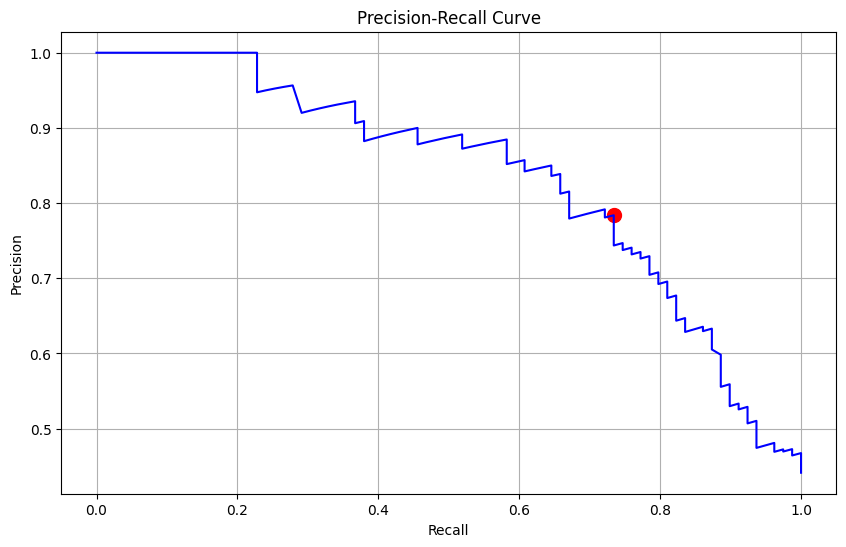

Best threshold: 0.41147741991849457 | Precision: 0.7837837837837838  | Recall: 0.7341772151898734


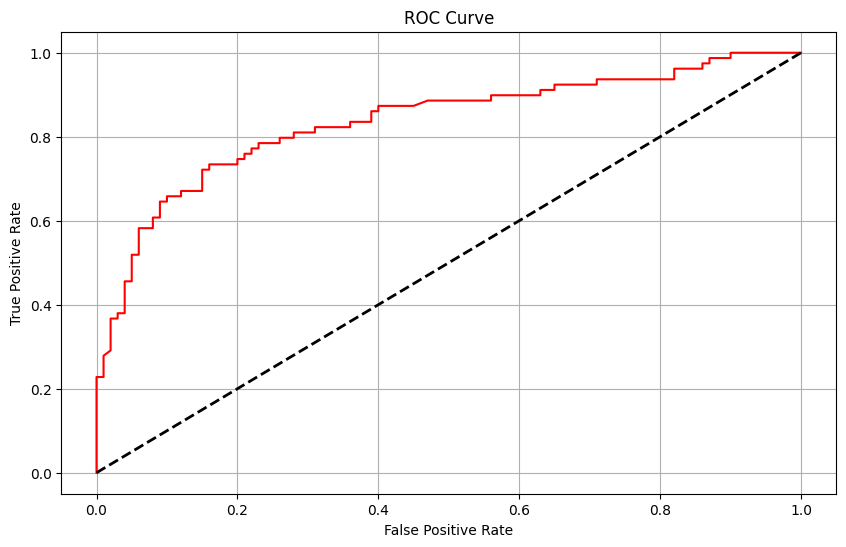

In [217]:
y_prob_pred = model.predict_proba(X_test)[:,1]
th,pr,re=plot_precision_recall_curve(y_test, y_prob_pred)
print(f"Best threshold: {th} | Precision: {pr}  | Recall: {re}")
plot_roc_curve(y_test, y_prob_pred)

Per una banda, la Precision-Recall Curve mostra la relació entre la precisió (proporció de prediccions positives correctes) i el recall (proporció de casos positius detectats pel model). D'altra banda, la ROC Curve mostra la relació entre la taxa de veritables positius (TPR o recall) i la taxa de falsos positius (FPR).
En el nostre cas, la Precision-Recall Curve és més rellevant, ja que la metrica utilitzada per avaluar els models, el f1_score, utilitza tant la precisió com el recall.

#### Classification Report
Anem a cridar el mètode en el model anterior per observar què mostra.

In [218]:
from sklearn.metrics import classification_report

y_pred = (y_prob_pred >= th).astype(int)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       100
           1       0.78      0.68      0.73        79

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.77       179



Aquest mètode genera un informe inclou les següents mètriques per avaluar el model:
- Precision: Mesura la proporció de prediccions positives correctes respecte al total de prediccions positives fetes pel model.
- Recall: Mesura la proporció de casos positius correctament identificats pel model respecte al total de casos positius reals.
- F1-Score: És la mitjana harmònica entre precisió i recall. Proporciona un equilibri entre ambdues mètriques.
- Support: Indica el nombre de casos reals de cada classe en el conjunt de dades.

Pel nostre cas, ens centrerem en optimitzar el valor de f1-score, degut a que és la mètrica que hem seleccionat. És la que s'adequa més al tipus de problema que tenim.

## 4. Model Selection amb validacio creuada (4 punts)

Fent servir la metrica trobada en l'apartat anterior, en aquest apartat caldra seleccionar una serie de models i, fent us de la validacio creuada, seleccionar el millor model amb els seus respectius millors hyperparametres que haurem buscat fent hyperparameter search.

La tasca d'aquesta pràctica s'enmarca dins l'aprenentatge computacional **supervisat**. A sklearn, disposem de varies tècniques [(veure documentació)](https://scikit-learn.org/stable/supervised_learning.html). A les classes de teoria, hem vist varies tècniques, com ara logistic regression, SVM amb diferents kernels, Nearest Neighbour... i tambe coneixeu altres tecniques d'altres cursos, com els arbres de decisio. Ademes, en la classe de problemes hem donat tambe els random forest i els gradient boosting. Per aquest apartat es demana seleccionar **un minim de 4 models** (per exemple, regressio logistica, random forest, KNN, SVM).

**Preguntes:**
* Quins models heu considerat? Perque els heu seleccionat?
* Fent servir validacio creuada, escolliu el millor model (agafant els hiperparamtres per defecte). Recordeu fer servir la metrica utilitzada en l'apartat anterior. Perque es important fer servir validacio creuada? Heu de fer servir algun [tipus de validacio creuada](https://scikit-learn.org/stable/modules/cross_validation.html) en especial?

* Seleccioneu una serie d'hyperparametres a provar per cadascun dels models i realitzeu una cerca d'hyperparametres. Hi ha algun model que creieu que podeu descartar de primeres? Perque?

* Mostreu els resultats en una taula on es mostri el model, els experiments realitzats i els resultats obtinguts (tant en train com en test). Podeu mostrar tambe el temps d'entrenament de cada model.

* Quin tipus de K-fold heu escollit en la seleccio de models? I en la seleccio de models amb hyperparametres? Com afecta al resultat modificar el numero de k (numero de folds) al resultat?

* Quines formes de buscar el millor parametre heu trobat? Són costoses computacionalment parlant? [documentació](https://scikit-learn.org/stable/modules/grid_search.html) Quina heu seleccionat?

* Si disposem de recursos limitats (per exemple, un PC durant 1 hora) quin dels métodes creieu que obtindrà millor resultat final?

* Existeixen altres mètodes de búsqueda més eficients ([scikit-optimize](https://scikit-optimize.github.io/stable/))?

* Opcional : Feu la prova, i amb el model i el metode de crossvalidació escollit, configureu els diferents metodes de búsqueda per a que s'executin durant el mateix temps (i.e. depenent del problema, 0,5h-1 hora). Analitzeu quin ha arribat a una millor solució. (Ajuda: estimeu el temps que trigarà a fer 1 training el vostre model, i aixi trobeu el número de intents que podeu fer en cada cas.)


#### Models a considerar

A l'hora de triar un model per adreçar un problema de classificació hi ha molts tipus entre els quals triar. Cada un, ens ofereix uns avantatges respecte la resta. En el nostre cas, hem optat per seleccionar els següents:
- Logistic regression: És un dels models més senzills, intuïtius i ràpid per a classificació binària.
- SVM: És molt efectiu quan el nombre de dimensions és gran o les classes no són linealment separables.
- KNN: És molt senzill, no requereix entrenament. Classifica segons els veins més propers.
- Decision tree: És un model senzill i de fàcil interpretabilitat.
- Random forest: Tendeix a reduir l'overfitting d'un decision tree.

Abans però, afegirem una nova versió del dataset a la qual s'ha aplicat una reducció de dimensionalitat especifica per cada model. És per això que aquesta selecció es fa en aquest apartat i no a l'apartat 2 amb la resta, ja que és necessàri primer plantejar els models a utilitzar. El que es farà és seleccionar aquelles variables que són més importants segons cada model.

#### Selecció de característiques més importants per model

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

selected_data = {}

def select_important_features(model, X_norm, X_train, threshold='mean'):
    model.fit(X_train, y_train)
    if hasattr(model, 'feature_importances_'):
        selector = SelectFromModel(model, threshold=threshold, prefit=True)
        mask = selector.get_support()
    elif hasattr(model, 'coef_'):
        selector = SelectFromModel(model, threshold=threshold, prefit=True)
        mask = selector.get_support()
    else:
        print(f" --- El model {model.__class__.__name__} no suporta selecció de característiques. S'afageixen totes les variables---")
        mask = np.ones(X_norm.shape[1], dtype=bool)
    X_norm_selected = X_norm[:, mask] if isinstance(X_norm, np.ndarray) else X_norm.loc[:, mask]
    return X_norm_selected, mask

random_state = 27

for name, model in classifiers.items():
    print(f"Seleccionant característiques importants per {name}")
    X_norm_selected, mask = select_important_features(model, X_norm, X_train)
    selected_data[f'{name}'] = X_norm_selected
    selected_data[f'{name}_mask'] = mask

Seleccionant característiques importants per Logistic Regression
Seleccionant característiques importants per Decision Tree
Seleccionant característiques importants per Random Forest
Seleccionant característiques importants per Gradient Boosting
Seleccionant característiques importants per SVC
Seleccionant característiques importants per KNN
 --- El model KNeighborsClassifier no suporta selecció de característiques. S'afageixen totes les variables---


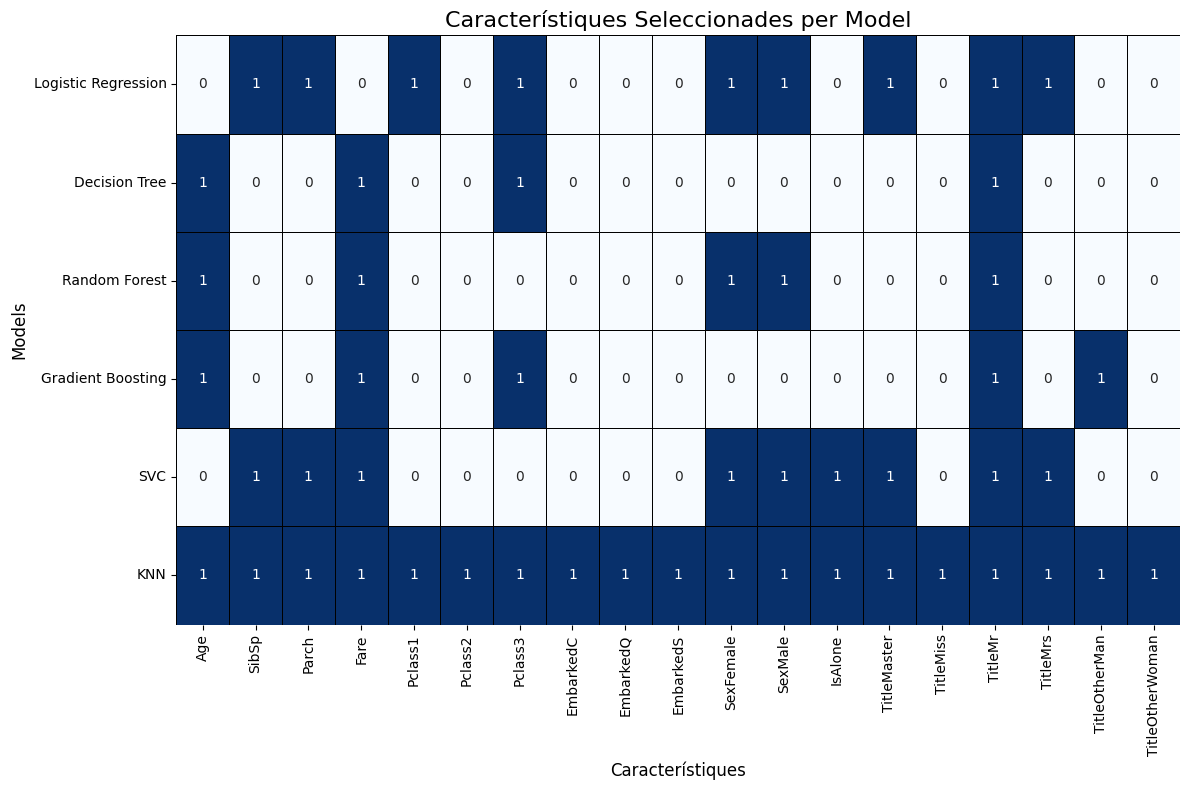

In [220]:
classifier_names = classifiers.keys()
feature_selection_df = pd.DataFrame(
    index=classifier_names, 
    columns=attributes
)
for model_name in classifier_names:
    mask = selected_data[f'{model_name}_mask']
    feature_selection_df.loc[model_name] = mask

feature_selection_df = feature_selection_df.astype(int)

plt.figure(figsize=(12, 8))
sns.heatmap(feature_selection_df, cmap='Blues', annot=True, cbar=False, 
            linewidths=.5, linecolor='black')
plt.title('Característiques Seleccionades per Model', fontsize=16)
plt.xlabel('Característiques', fontsize=12)
plt.ylabel('Models', fontsize=12)

plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

Observem que, evidentment, els atributs que més es repeteixen en la selecció dels diferents models són, exceptuant "Age", els que tenien una correlació amb "Survived" més forta a la matriu de correlació. 

#### Validació creuada per triar el millor model i dataset (per defecte)

Ara que ja tenim la versió del dataset que ens faltava, ja podem realitzar una validació creuada utilitzant els models definits anteriorment (amb els paràmetres que tenen per defecte) per tenir una primera idea de com es comporta cada model. Actualment però, tenim diferents versions del conjunt de dades, així que també triarem per cada model quin és el conjunt que ofereix un millor resultat.

És important realitzar la validació creuada perquè permet avaluar el rendiment d'un model de manera més fiable, assegurant que el model generalitza bé a dades noves. Utilitzem cross_val_score() de la llibreria sklearn perquè s'encarrega de dividir el conjunt de dades en múltiples subconjunts i els evalua repetidament, retornant la mitjana dels resultats.

In [221]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

random_state = 27

# Ens falten les dades amb PCA per n = 4,5
pca_4 = PCA(n_components=4, random_state=random_state)
X_data_pca_4 = pca_4.fit_transform(X_norm)
pca_5 = PCA(n_components=5, random_state=random_state)
X_data_pca_5 = pca_5.fit_transform(X_norm)

data_list = [['Original',X_norm], ['PCA 2 components',X_data_pca_2], ['PCA 3 components',X_data_pca_3], ['PCA 4 components',X_data_pca_4],['PCA 5 components',X_data_pca_5], ['Selected Features',selected_data]]
f1_scorer = make_scorer(f1_score, average='weighted')

cv = StratifiedKFold(n_splits=20, random_state=random_state, shuffle=True)

results = []
scores_for_dataset = {name: [] for name in classifier_names}
sum_f1_scores_per_dataset = {name: {} for name in classifier_names}

for name, clf in classifiers.items():
    for dataset in data_list:
        if dataset[0]=='Selected Features':
            data = dataset[1][name]
        else:
            data = dataset[1]
        scores = cross_val_score(clf, data, y, cv=cv, scoring=f1_scorer)
        avg_score = np.mean(scores)
        results.append({
            'Classifier': name,
            'Average F1 Score': avg_score,
            'Dataset': dataset[0]
        })
        print(f'{name}: Average F1 Score = {avg_score:.4f} Dataset: {dataset[0]}')
        scores_for_dataset[name].append(avg_score)
        if dataset[0] not in sum_f1_scores_per_dataset[name]:
            sum_f1_scores_per_dataset[name][dataset[0]] = avg_score
        else:
            sum_f1_scores_per_dataset[name][dataset[0]] += avg_score

results_df = pd.DataFrame(results)

best_datasets_per_model = {}
for model, dataset_scores in sum_f1_scores_per_dataset.items():
    best_dataset = max(dataset_scores, key=dataset_scores.get)
    best_f1_sum = dataset_scores[best_dataset]
    best_datasets_per_model[model] = {'Dataset': best_dataset, 'F1 Score Sum': best_f1_sum}

print("nMillor dataset para cada model:")
for model, info in best_datasets_per_model.items():
    print(f"Classificador: {model} |  Millor Dataset: {info['Dataset']}")

best_model = results_df.loc[results_df['Average F1 Score'].idxmax()]
print("\nMillor model (amb els valors per defecte):")
print(f"Classificador: {best_model['Classifier']}")
print(f"F1 Score Mitjà: {best_model['Average F1 Score']:.4f}")

Logistic Regression: Average F1 Score = 0.8229 Dataset: Original
Logistic Regression: Average F1 Score = 0.7763 Dataset: PCA 2 components
Logistic Regression: Average F1 Score = 0.7800 Dataset: PCA 3 components
Logistic Regression: Average F1 Score = 0.7783 Dataset: PCA 4 components
Logistic Regression: Average F1 Score = 0.7675 Dataset: PCA 5 components
Logistic Regression: Average F1 Score = 0.8252 Dataset: Selected Features
Decision Tree: Average F1 Score = 0.7826 Dataset: Original
Decision Tree: Average F1 Score = 0.7377 Dataset: PCA 2 components
Decision Tree: Average F1 Score = 0.7489 Dataset: PCA 3 components
Decision Tree: Average F1 Score = 0.7354 Dataset: PCA 4 components
Decision Tree: Average F1 Score = 0.7496 Dataset: PCA 5 components
Decision Tree: Average F1 Score = 0.7593 Dataset: Selected Features
Random Forest: Average F1 Score = 0.7992 Dataset: Original
Random Forest: Average F1 Score = 0.7702 Dataset: PCA 2 components
Random Forest: Average F1 Score = 0.7718 Dataset

Si observem el codi, a l'hora de fer els K-folds hem optat per la funció StratifiedKfold amb numero de folds = 20. L'elecció del tipus es deu a que el mètode Stratified ens ofereix unes particions on es manté la proporció de classes (evitant distribucions de dades no representatives). Pel que fa al número de folds, s'ha escollit perquè millora la capacitat de generalització a dades no vistes i ajuda a obtenir una puntuació F1 mitjana que reflecteix millor el comportament del model en situacions del món real. Obtenim una conclusió més consistent.

Anem a fer una visualització dels resultats

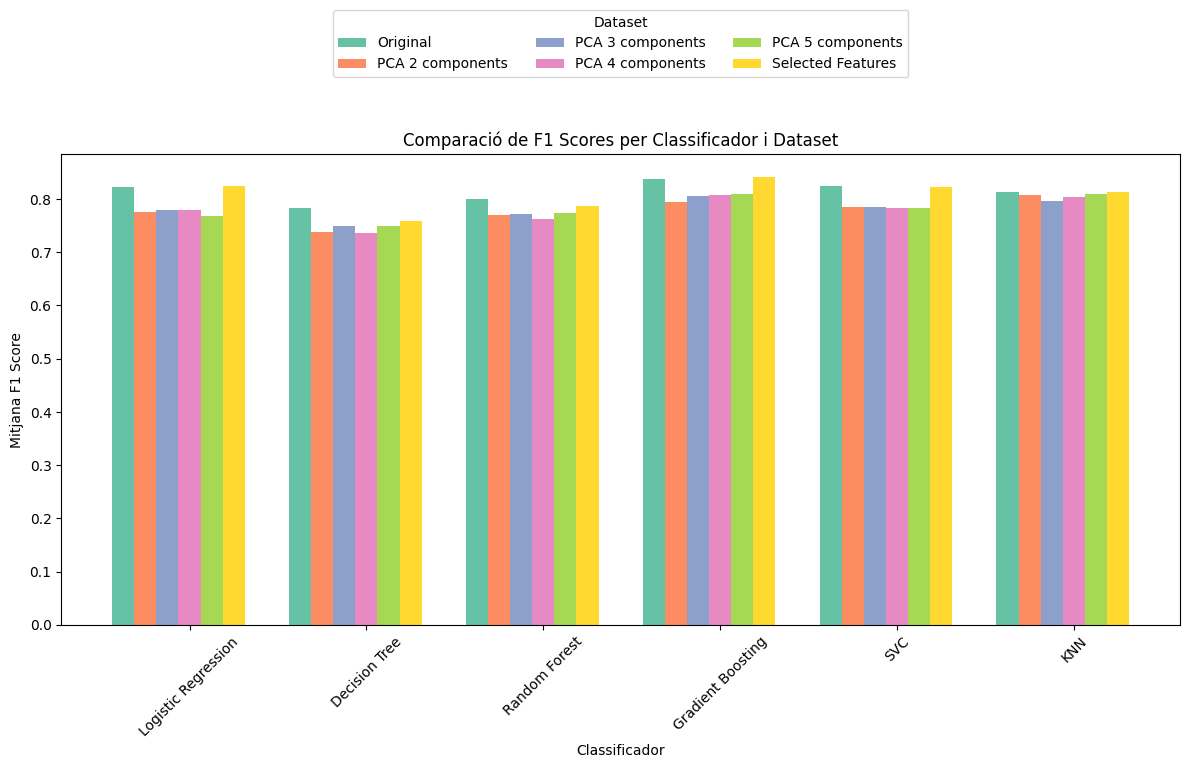

In [222]:
fig, ax = plt.subplots(figsize=(12, 8))
colors = sns.color_palette("Set2", len(results_df['Dataset'].unique()))

bar_width = 0.15

separation_factor = 1.2
positions = np.arange(len(classifier_names)) * separation_factor

for i, dataset in enumerate(data_list):
    subset = results_df[results_df['Dataset'] == dataset[0]]
    ax.bar(positions + i * bar_width, subset['Average F1 Score'], width=bar_width, label=dataset[0], color=colors[i])

ax.set_xlabel('Classificador')
ax.set_ylabel('Mitjana F1 Score')
ax.set_title('Comparació de F1 Scores per Classificador i Dataset')

ax.set_xticks(positions + bar_width * (len(data_list) / 2))
ax.set_xticklabels(classifier_names, rotation=45)

ax.legend(title='Dataset', bbox_to_anchor=(0.5, 1.15), loc='lower center', ncol=3)

plt.tight_layout()

plt.show()

Pel que fa a les dades utilitzades, observem que els resultats són bastant semblants entre datasets, encara que ens ofereix uns millors resultats l'original, seguit de poc pel "Selected Features". Com que la diferència en l'f1_score utilitzant els 2 conjunts de dades és mínima i hi ha un canvi bastant interessant en la dimensionalitat, conservarem els dos conjunts a partir d'ara. Els conjunts de dades on s'ha aplicat PCA ja no es faran servir més ja que redueixen el rendiment dels models.

D'altra banda, amb els valors per defecte, el model que en mitjana de tots els splits ofereix un millor rendiment pel conjunt de test és el Gradient Boosting. Tot i això, podria ser que modificant els paràmetres dels models el millor fós un altre. Per tal de trobar el millor model farem una cerca d'hyperperàmetres per cada un dels models anteriors.

#### Cerca d'hyperpàrametres pels models

A continuació, definim una funció que pren una llista de classificadors i els corresponents "grids" d'hyperperàmetres a provar, i realitza una GridSearch amb validació creuada per trobar la combinació de paràmetres que dona la puntuació més alta per a cadascun dels models.

In [223]:
import time
from sklearn.model_selection import StratifiedKFold, GridSearchCV

random_state=27
def hyperparameters_search(classifiers, param_grids, data_list, y_data, cv_splits=10, score='f1'):
    
    kfold = StratifiedKFold(n_splits=cv_splits, random_state=random_state, shuffle=True)
    results = []
    for data in data_list:
        dataset_name = data[0]
        print(f'DATASET: {dataset_name}')
        if dataset_name=='Original':
            X_norm = data[1]
        for name, model in classifiers.items():
            if dataset_name=='Selected_features':
                X_norm = selected_data[name]
            print(f"\nEvaluant {type(model).__name__}")        
            
            start_time = time.time()  
            gs = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=kfold, 
                  scoring=make_scorer(f1_score, average='weighted'), n_jobs=-1)
            gs.fit(X_norm, y_data)
            cv_results = gs.cv_results_
            best_index = gs.best_index_
            mean_f1_best_model = cv_results['mean_test_score'][best_index]
            best_params = gs.best_params_
            end_time = time.time()  
            calc_time = end_time - start_time 

            results.append({
                'Dataset': dataset_name,
                'Classifier': name,
                'Mean Test Score (F1)': mean_f1_best_model,
                'Execution Time (s)': calc_time,  
                'Best Parameters': best_params,
                'Best Estimator': gs.best_estimator_  
            })
            print(f'Dataset: {dataset_name}, Classifier: {type(model).__name__}, Mean Test Score: {mean_f1_best_model:.4f}, Time: {calc_time:.2f}s')

    return pd.DataFrame(results)

On els diferents paràmetres i models a provar són els següents (els models ja els tenim guardats a la variable classifiers)

In [224]:
# Paràmetres pel Logistic Regressor
lr_param_grid = {'random_state' : [random_state], 
                 'penalty' : ['l2'], 
                 'solver' : ['lbfgs'], 
                 'C' : [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}


# Paràmetres pel DTC
dtc_param_grid = {'random_state' : [random_state],
                  'criterion' : ['gini'],
                  'max_depth' : [None, 3, 5, 7, 10],
                  'min_samples_leaf' : [1, 5, 10], 
                  'min_samples_split' : [2, 5, 10],
                  'max_features': [None, 1, 2, 3, 4]}

# Paràmetres pel RFC
rfc_param_grid = {'random_state': [random_state],
                  'criterion': ['gini', 'entropy'],
                  'max_features': [None, 2, 3, 4],
                  'max_depth': [None, 10, 20, 30],
                  'min_samples_split': [2, 5, 10],
                  'min_samples_leaf': [1, 2, 4],
                  'class_weight': [None, 'balanced'],
}

# Paràmetres pel GBC
gbc_param_grid = {
    'random_state': [random_state], 
    'loss': ['exponential'],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Paràmetres pel SVC
svc_param_grid = {'random_state' : [random_state],
                  'C' : [0.5, 1.0, 2.0, 4.0],
                  'gamma' : ['auto'],
                  'kernel' : ['rbf', 'linear', 'poly', 'sigmoid'],
                  'shrinking' : [True, False]}

# Paràmetres pel KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 10, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [30, 40, 50],
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
}

param_grid_list = {
    'Logistic Regression': lr_param_grid, 
    'Decision Tree': dtc_param_grid, 
    'Random Forest': rfc_param_grid, 
    'Gradient Boosting': gbc_param_grid,
    'SVC': svc_param_grid, 
    'KNN': knn_param_grid}

Anem a fer la cerca dels millors paràmetres.

In [225]:
#results_df = hyperparameters_search(classifiers, param_grid_list, [['Original', X_norm], ['Selected_features',selected_data]], np.array(y), cv_splits=8)

Guardem els resultats en un fitxer per no haver de tornar a executar la cela.

In [226]:
#results_df.to_csv("hyperparameters_search_results.csv", index=False)

Carreguem les dades del fitxer:

In [227]:
results_df = pd.read_csv('hyperparameters_search_results.csv')

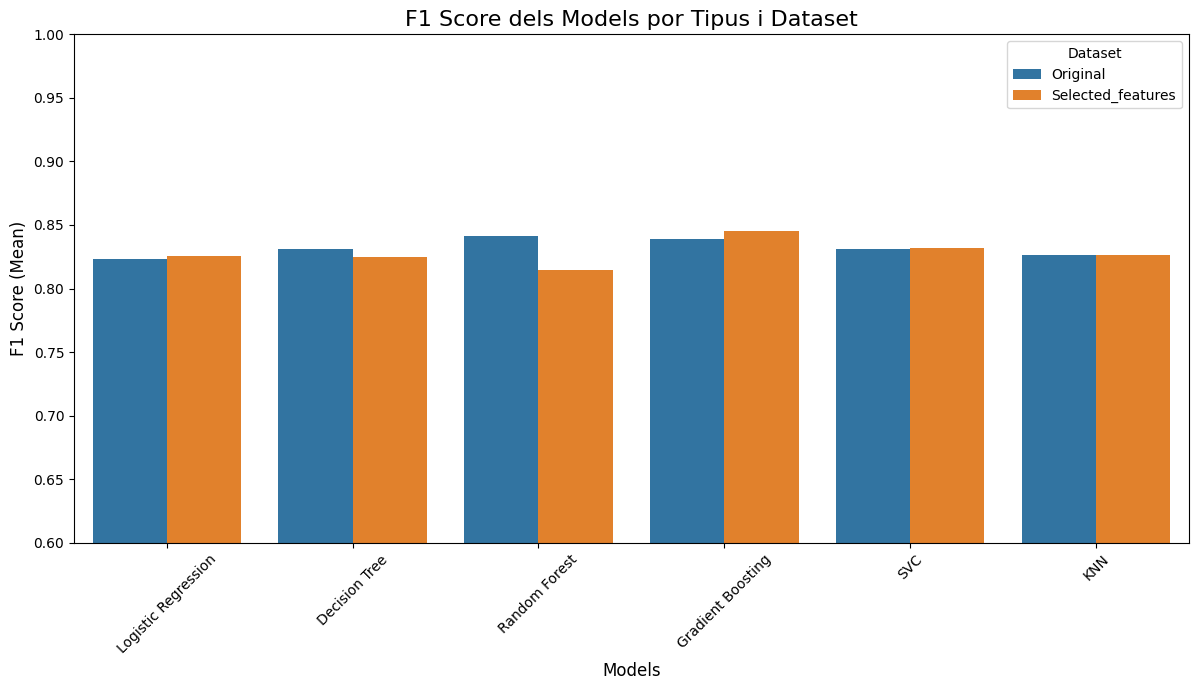

In [228]:
results_df['Model Type'] = results_df['Classifier'].apply(lambda x: x.split()[0])

plt.figure(figsize=(12, 7))
sns.barplot(data=results_df, x='Classifier', y='Mean Test Score (F1)', hue='Dataset')

plt.title('F1 Score dels Models por Tipus i Dataset', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('F1 Score (Mean)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Dataset')
plt.tight_layout()
plt.ylim(0.6,1)
plt.show()

Agafem el millor model

In [229]:
models_no_init = {
    'Logistic Regression': LogisticRegression,
    'Decision Tree': DecisionTreeClassifier,
    'Random Forest': RandomForestClassifier,
    'Gradient Boosting': GradientBoostingClassifier,
    'SVC': SVC,
    'KNN': KNeighborsClassifier
}

In [230]:
best_model_df = results_df.groupby(['Classifier', 'Dataset']).agg(
    Avg_Test_Score=('Mean Test Score (F1)', 'mean'),
    Best_Params=('Best Parameters', 'first')
).reset_index()

best_model_row = best_model_df.loc[best_model_df['Avg_Test_Score'].idxmax()]

best_model_name = best_model_row['Classifier']
best_model_params = eval(best_model_row['Best_Params']) 
model_class = models_no_init[best_model_name]
best_model = model_class(**best_model_params) 
best_model_row = best_model_df.loc[best_model_df['Avg_Test_Score'].idxmax()]

## 5.Analisi Final (1.5 punt)

Un cop seleccionat el millor model amb els millors hiperparamtres, caldra fer un report final amb els resultats obtinguts.

Preguntes:
* Mostreu les curves ROC/PR (la que hageu escollit en l'apartat 2) i interpreteu els resultats.

* Analitzeu en detall les diferents metriques que trobeu adients i comenteu per sobre com podrieu fer servir aquest model en un futur. Aixo es el que es coneix com un cas d'us.

* Com creieu que es podria millorar el vostre model?

El millor model és ...

In [231]:
best_model_row

Classifier                                        Gradient Boosting
Dataset                                           Selected_features
Avg_Test_Score                                             0.845605
Best_Params       {'learning_rate': 0.1, 'loss': 'exponential', ...
Name: 3, dtype: object

Observem que el fet de seleccionar les característiques més importants ens ha donat a lloc a un millor model que sense fer-ho. El valor mitjà de l'f1_score pels diversos splits del kfold és de aproximadament 0.85. Anem a veure si podem millorar encara més el resultat modificant el valor del threshold que determina si una probabilitat es considera de la classe 0 o 1.

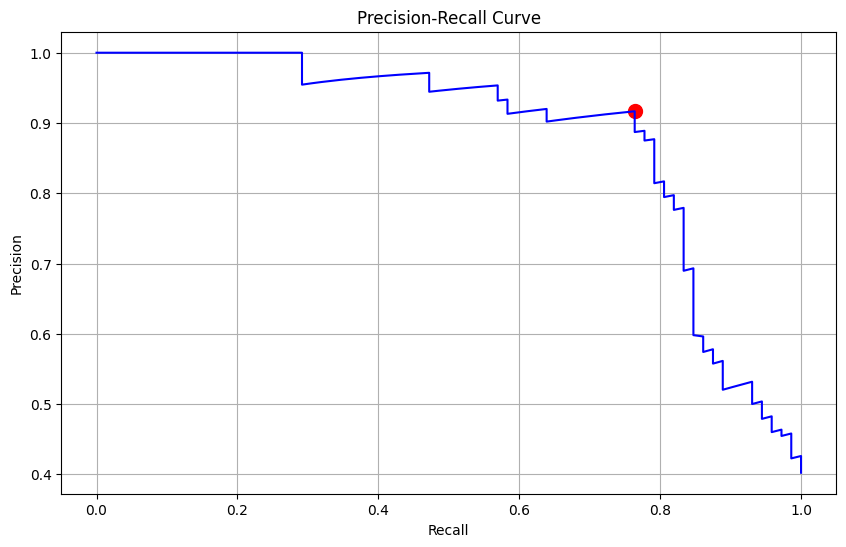

Best threshold: 0.564563063791116 | Precision: 0.9166666666666666  | Recall: 0.7638888888888888


In [232]:
test_size=0.2
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=test_size, random_state=33)
best_model.fit(X_train,y_train)
y_prob_pred = best_model.predict_proba(X_test)[:,1]
th,pr,re=plot_precision_recall_curve(y_test, y_prob_pred)
print(f"Best threshold: {th} | Precision: {pr}  | Recall: {re}")

Observem que el valor del threshold que maximitza l'f1_score() és {}. Anem a veure com varien els resultats al aplicar aquest valor:

In [233]:
y_pred = best_model.predict(X_test)
print("Threshold per defecte:")
print(classification_report(y_test, y_pred))
y_pred = (y_prob_pred >= th).astype(int)
print(f"Threshold = {th}:")
print(classification_report(y_test, y_pred))


Threshold per defecte:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       107
           1       0.90      0.76      0.83        72

    accuracy                           0.87       179
   macro avg       0.88      0.85      0.86       179
weighted avg       0.87      0.87      0.87       179

Threshold = 0.564563063791116:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       107
           1       0.92      0.76      0.83        72

    accuracy                           0.88       179
   macro avg       0.89      0.86      0.87       179
weighted avg       0.88      0.88      0.87       179



El fet de modificar el threshold del model no fa que el valor de f1_score pel nou split que hem fet de les dades millori significativament. En canvi si que s'equilibra més la precisió i el recall entre classes, donant a un model més robust. El fet que el threshold sigui inferior a 0.5 fa que el model sigui més propens a dir que el passatger sobreviu (és un model optimista).

Aquí s'acabaria la pràctica. Per últim però, provarem quin és el resultat d'utilitzar el millor model trobat per predir la supervivència dels passatgers del conjunt de test. Anem a generar el fitxer amb els resultats i el pengem a kaggle.

In [234]:
def make_all_transformations(df: pd.DataFrame, is_train: bool):
    id = df["PassengerId"]
    df.drop(['PassengerId', 'Ticket', "Cabin"], axis='columns', inplace=True)

    df = fill_embarked(df)
    df = convert_to_categorical(df)
    df = df.drop(['Name'], axis='columns')

    nan_percentage = df.isna().mean()
    nan_columns = nan_percentage[nan_percentage > 0]
    df = impute_cols(df, nan_columns.index.to_list())

    df = add_family_attributes(df)
    df = add_title_attribute(df)
    df = convert_title_to_numeric(df)
    df = df.drop(["FamilySize"], axis='columns')

    if is_train:
        y_train = df["Survived"]
        df = df.drop(['Survived'], axis='columns')
        return df, y_train

    if "Survived" in df.columns:
        df = df.drop(['Survived'], axis='columns')
    return df, id

In [235]:
best_model_dataset=best_model_row['Dataset']
if best_model_dataset=='Original':
    train_data = X_norm
else:
    train_data = selected_data[best_model_name]

best_model.fit(train_data, y)
df_test = pd.read_csv("./data/test.csv")
df_test, id_test = make_all_transformations(df_test, False)
sc = StandardScaler()
X_test_norm = sc.fit_transform(df_test)
if best_model_dataset != 'Original':
    mask = selected_data[best_model_name+'_mask']
    X_test_norm = X_test_norm[:, mask]

y_prob_pred = best_model.predict_proba(X_test_norm)[:,1]
y_pred = (y_prob_pred >= th).astype(int)

result = pd.DataFrame({
    "PassengerId": id_test,
    "Survived": y_pred
})

result.to_csv("./data/results_test.csv", index=False)

Després de penjar-ho a kaggle veiem que tenim un problema. Al provar-ho amb el conjunt de test el rendiment del model disminueix considerablement. Passem d'un valor 0.87 de f1_score a una accuracy de 0.55 per les dades de test.

Aquesta diferència es pot deure a un diferència en la distribució entre les dades del conjunt d'entrenament i el de test. No creiem que el problema vingui degut a un overfitting ja que si fos el cas, ja ens hauria aparegut aquest problema quan provem el millor model amb les dades de train (ja que fem un split i hi ha dades que el modell no ha vist)

#### Possibles millores

Per millor el model final que hem obtingut, podriem aplicar diverses millores:
- Tractar les dades que s'han eliminat (Ticket i Cabin) d'alguna manera. Abans, però, hauriem de trobar una manera d'omplir els NaNs de Cabin.
- Omplir els NaNs de l'edat d'alguna altra manera (seguint la distribució inicial, per exemple)
- Buscar si hi ha alguna manera de normalitzar que s'adeqüi més a les dades que tenim.
- Mirar altres possibles variables a afegir per guanyar informació dels passatgers.
- Construir més models i realitzar una cerca més àmplia d'hyperparàmetres.
- Utilitzar també el dataset després d'aplicar PCA en la cerca d'hyperparàmetres. No s'ha fet per reduir el cost.
- Realitzar més splits a la hora de fer la cerca d'hyperparàmetres. S'ha fet amb 8 per reduir el cost.